In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import nltk
import contractions
import re

UsageError: Line magic function `%` not found.


In [41]:
df = pd.read_excel('Input_Data_Synthetic.xlsx',encoding='latin-1')

In [0]:
df = pd.read_excel('/content/drive/My Drive/Capstone Project/Input_Data.xlsx')

In [0]:
df.to_csv('/content/drive/My Drive/Capstone Project/Input_Data.csv')

In [0]:
df = pd.read_csv('/content/drive/My Drive/Capstone Project/Input_Data.csv',encoding='latin-1')
df.drop('Unnamed: 0',inplace=True,axis=1)

In [26]:
df.head()

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,English,English
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,English,English
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,English,English
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,English,English
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,English,English


In [7]:
print(df.shape)
print(df.size)
print(df.info())

(8500, 4)
34000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
Short description    8492 non-null object
Description          8499 non-null object
Caller               8500 non-null object
Assignment group     8500 non-null object
dtypes: object(4)
memory usage: 265.8+ KB
None


In [8]:
print(len(df['Short description']))
print(len(set(df['Short description'])))
len(df['Short description'].unique())

8500
7482


7482

In [9]:
print(len(df['Description']))
print(len(set(df['Description'])))
len(df['Description'].unique())

8500
7818


7818

In [10]:
print(len(df['Caller']))
print(len(set(df['Caller'])))
len(df['Caller'].unique())

8500
2950


2950

In [11]:
unique_group = df['Assignment group'].unique()
print(unique_group)

['GRP_0' 'GRP_1' 'GRP_3' 'GRP_4' 'GRP_5' 'GRP_6' 'GRP_7' 'GRP_8' 'GRP_9'
 'GRP_10' 'GRP_11' 'GRP_12' 'GRP_13' 'GRP_14' 'GRP_15' 'GRP_16' 'GRP_17'
 'GRP_18' 'GRP_19' 'GRP_2' 'GRP_20' 'GRP_21' 'GRP_22' 'GRP_23' 'GRP_24'
 'GRP_25' 'GRP_26' 'GRP_27' 'GRP_28' 'GRP_29' 'GRP_30' 'GRP_31' 'GRP_33'
 'GRP_34' 'GRP_35' 'GRP_36' 'GRP_37' 'GRP_38' 'GRP_39' 'GRP_40' 'GRP_41'
 'GRP_42' 'GRP_43' 'GRP_44' 'GRP_45' 'GRP_46' 'GRP_47' 'GRP_48' 'GRP_49'
 'GRP_50' 'GRP_51' 'GRP_52' 'GRP_53' 'GRP_54' 'GRP_55' 'GRP_56' 'GRP_57'
 'GRP_58' 'GRP_59' 'GRP_60' 'GRP_61' 'GRP_32' 'GRP_62' 'GRP_63' 'GRP_64'
 'GRP_65' 'GRP_66' 'GRP_67' 'GRP_68' 'GRP_69' 'GRP_70' 'GRP_71' 'GRP_72'
 'GRP_73']


In [12]:
unique_group = pd.DataFrame(unique_group)
unique_group.count()

0    74
dtype: int64

In [0]:
null_value = (df.isna().sum()/df.count().round(2))*100

Text(0.5, 0, 'Table Features')

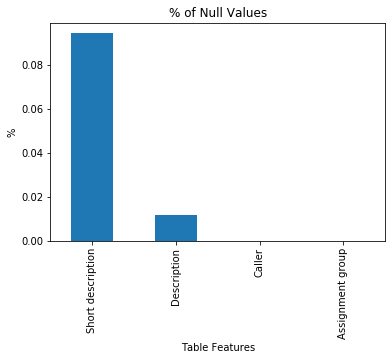

In [14]:
null_value.plot(kind='bar')
plt.title('% of Null Values')
plt.ylabel('%')
plt.xlabel('Table Features')

In [0]:
group_freq = df.groupby(df['Assignment group'])['Assignment group'].count().sort_values(ascending=False)
group_freq = pd.DataFrame(group_freq)

In [16]:
group_freq

,Assignment group
Assignment group,
GRP_0,3976
GRP_8,661
GRP_24,289
GRP_12,257
GRP_9,252
...,...
GRP_67,1
GRP_61,1
GRP_73,1


In [0]:
group_freq["cumpercentage"] = group_freq["Assignment group"].cumsum()/group_freq["Assignment group"].sum()*100

In [0]:
from matplotlib.ticker import PercentFormatter

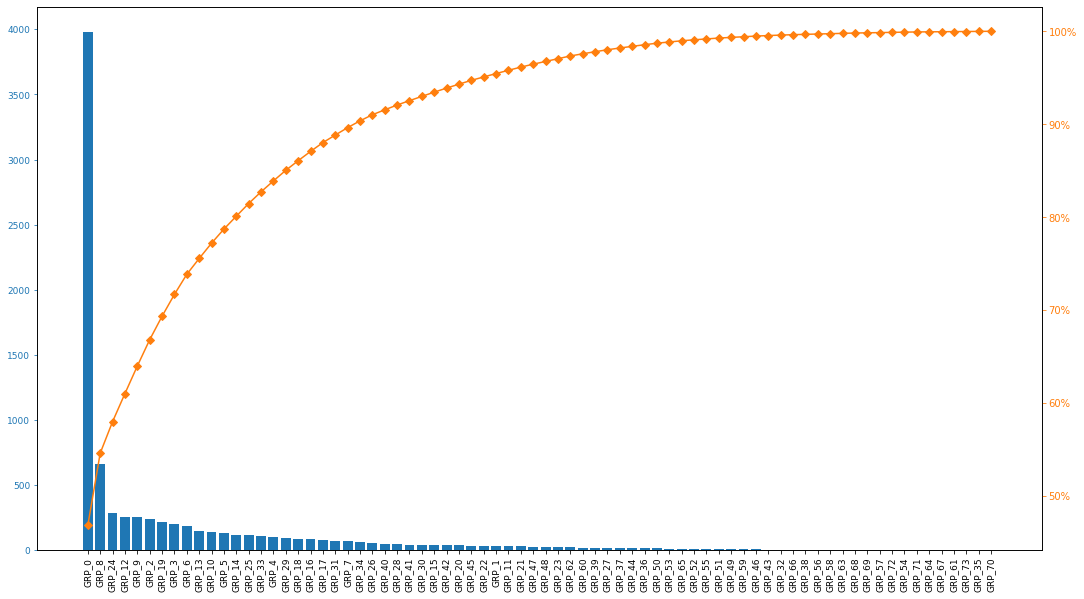

In [19]:
fig, ax = plt.subplots(figsize=(18,10))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=9)
#import matplotlib 
#matplotlib.rc('xtick', labelsize=10) 
#matplotlib.rc('ytick', labelsize=10) 
ax.bar(group_freq.index, group_freq["Assignment group"], color="C0")
ax2 = ax.twinx()
ax2.plot(group_freq.index, group_freq["cumpercentage"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

In [20]:
a = df['Caller'].unique()
a = pd.DataFrame(a)
a.count()

0    2950
dtype: int64

In [0]:
caller_freq = df.groupby(df['Caller'])['Caller'].count().sort_values(ascending=False)
caller_freq = pd.DataFrame(caller_freq)
caller_freq["cumpercentage"] = (caller_freq["Caller"].cumsum()/caller_freq["Caller"].sum()*100).round(2)

In [22]:
caller_freq.head(2000)

,Caller,cumpercentage
Caller,,
bpctwhsn kzqsbmtp,810,9.53
ZkBogxib QsEJzdZO,151,11.31
fumkcsji sarmtlhy,134,12.88
rbozivdq gmlhrtvp,87,13.91
rkupnshb gsmzfojw,71,14.74
...,...,...
dcsaiweo qvstjlem,1,88.78
xwyrvcbj bmqfszjg,1,88.79
xwlcqfsr lbcqfnie,1,88.80


In [0]:
df['Description'] = df['Description'].astype(str)
df['Short description'] = df['Short description'].astype(str)
df['Caller'] = df['Caller'].astype(str)

In [24]:
df['Desc_word_count'] = df['Description'].str.split().map(len)
df['Short_desc_word_count'] = df['Short description'].str.split().map(len)
df.head()

,Short description,Description,Caller,Assignment group,Desc_word_count,Short_desc_word_count
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,33,2
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,25,1
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,11,5
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,5,5
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,2,2


In [25]:
df['Desc_word_count'].describe()

count    8500.000000
mean       27.300588
std        65.045347
min         0.000000
25%         6.000000
50%        11.000000
75%        28.000000
max      1625.000000
Name: Desc_word_count, dtype: float64

In [26]:
df['Short_desc_word_count'].describe()

count    8500.000000
mean        6.934471
std         4.117559
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        28.000000
Name: Short_desc_word_count, dtype: float64

In [27]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
stop_words = set(stopwords.words('english'))#stop words stored in 'a'

In [0]:
df['Desc_no_stp_wrd'] = df['Description'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
df['Short_no_stp_wrd'] = df['Short description'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
df['Desc_no_dgt'] = df['Description'].apply(lambda x: len([x for x in x if x.isdigit()]))
df['Shrt_Desc_no_dgt'] = df['Short description'].apply(lambda x: len([x for x in x if x.isdigit()]))

In [34]:
print(df['Desc_word_count'].sum())
print(df['Short_desc_word_count'].sum())

print(df['Desc_no_dgt'].sum())
print(df['Shrt_Desc_no_dgt'].sum())

print(df['Desc_no_stp_wrd'].sum())
print(df['Short_no_stp_wrd'].sum())


232055
58943
115672
28483
60725
13159


In [0]:
import re

In [0]:
df1.drop(['Desc_word_count','Short_desc_word_count','Desc_no_stp_wrd','Short_no_stp_wrd','Desc_no_dgt','Shrt_Desc_no_dgt'],axis=1,inplace=True)

In [0]:
df1['Description'] = df1['Description'].astype(str)
df1['Short description'] = df1['Short description'].astype(str)
df1['Caller'] = df1['Caller'].astype(str)

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
Short description    8500 non-null object
Description          8500 non-null object
Caller               8500 non-null object
Assignment group     8500 non-null object
dtypes: object(4)
memory usage: 265.8+ KB


In [42]:
df1['Description'][8499]

'an mehreren pc`s lassen sich verschiedene prgramdntyme nicht Ã\x83Â¶ffnen. bereich cnc.'

In [0]:
# df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"\W", ' ', x)) # Removed all punctuations or non word characters marks
# df1['Description'] = df1['Description'].apply(lambda x: x.lower()) #Converted to lower case
# df1['Description'] = df1['Description'].apply(lambda x: re.sub(r'\s+[a-z]\s+', ' ', x)) # Removed all single characters
# df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"^[a-z]\s+", ' ', x)) # Removed all single characters from start of the sentence
# df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"[!';:@#$%^&*()~?<>,\.:+-=`""'\'_]", ' ', x)) # Removed all the special characters
# df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"\s+", ' ', x))# Removed extra (one or more) spaces
# df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"\d", '', x)) # Removed digits
# df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"\s+[a-zA-Z]\s+", '', x))
# df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"^\s", '', x)) # Removed all the space at starta and end of sentences
# df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"\s$", '', x)) ## Removed all the space at starta and end of sentences
# df1['Description'] = df1['Description'].apply(lambda x: re.sub("([^\x00-\x7F])+", '', x))

In [44]:
df1['Description'][8499]

'an mehreren pc lassen sich verschiedene prgramdntyme nicht   ffnen bereich cnc'

In [0]:
# df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"that's","that is",x))
# df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"there's","there is",x))
# df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"what's","what is",x))
# df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"where's","where is",x))
# df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"it's","it is",x))
# df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"who's","who is",x))
# df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"i'm","i am",x))
# df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"she's","she is",x))
# df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"he's","he is",x))
# df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"they're","they are",x))
# df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"who're","who are", x))
# df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"ain't","am not", x))
# df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"wouldn't","would not",x))
# df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"can't","can not",x))
# df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"shouldn't","should not",x))
# df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"couldn't","could not",x))
# df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"won't","will not",x))
# df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"isn't","is not",x))

In [66]:
def preprocess(text):
    sentence     = str(text)
    sentence_low = sentence.lower()                                            #Converted to lower case
    rem_hyper    = sentence_low.replace('{html}',' ')                          #Remove hyperlink  
    rem_url      = re.sub(r'http:\S+', ' ',rem_hyper)                          #Remove Web link
    rem_mail     = re.sub(r"\S*@\S*.com\s?",' ',rem_url)                       #Remove mail Id
    txt_expand   = contractions.fix(rem_mail)                                  #Expand text
    rem_special  = re.sub(r"[!';:@#$%^&*()~?<>,\.:+-=`""'\'_]",' ',txt_expand) # Removed all the special characters 
    rem_num      = re.sub(r'\d', '', rem_special)                              #Remove digit
    rem_single   = re.sub(r"\s+[a-zA-Z]\s+", ' ',rem_num)                      #Remove single char
    rem_spa      = re.sub(r"\s+", ' ',rem_single)                              #Remove extra spaces
    clean_text   = rem_spa
    return clean_text

In [28]:
df['Short description'][7]  #before pre-process

"ticket_no1550391- employment status - new non-employee [enter user's name]"

### Text Cleaning

In [67]:
df['Short description'] = df['Short description'].map(lambda x:preprocess(x))
df['Description'] = df['Description'].map(lambda x:preprocess(x))

In [72]:
df['Short description'][7]  #after process

'ticket no employment status new non employee [enter user name]'

In [71]:
df['Description'][3726]

' received from dear sir refer below snapshot of pdf output of engineering tool batch number is not appearing in pdf output [cid image jpg sid ] why batch number is important in case of variation in tool life from batch to batch customer raises the complaint we send ccif with engineering tool in engineering tool software we enter batch number but when download pdf it does not show batch number without batch number analysis cannot be done that is why it is very important to capture batch number in engineering tool pdf output for your necessary action '

In [46]:
df1.head(100)

,Short description,Description,Caller,Assignment group
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi c...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
95,job SID_26cold failed in job_scheduler at: 10/...,received from monitoring tool company com job ...,bpctwhsn kzqsbmtp,GRP_5
96,job SID_35cold failed in job_scheduler at: 10/...,received from monitoring tool company com job ...,bpctwhsn kzqsbmtp,GRP_5
97,amssm00345: c:\ label:sys-amssm00345 94ef9088 ...,amssm label sys amssm ef on server is over spa...,jyoqwxhz clhxsoqy,GRP_12
98,unable to view payslips from hr_tool e time,unable to view payslips from hr tool time,vzrbocfl wxtpoyez,GRP_0


In [47]:
  df1['Description'][1]

'received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind'

In [48]:
df['Description'][1]

'\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind '

In [51]:
df1.head(100)

,Short description,Description,Caller,Assignment group
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi c...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
95,job SID_26cold failed in job_scheduler at: 10/...,received from monitoring tool company com job ...,bpctwhsn kzqsbmtp,GRP_5
96,job SID_35cold failed in job_scheduler at: 10/...,received from monitoring tool company com job ...,bpctwhsn kzqsbmtp,GRP_5
97,amssm00345: c:\ label:sys-amssm00345 94ef9088 ...,amssm label sys amssm ef on server is over spa...,jyoqwxhz clhxsoqy,GRP_12
98,unable to view payslips from hr_tool e time,unable to view payslips from hr tool time,vzrbocfl wxtpoyez,GRP_0


In [52]:
df1.describe()

,Short description,Description,Caller,Assignment group
count,8500,8500,8500,8500
unique,7482,6681,2950,74
top,password reset,received from monitoring tool company com job ...,bpctwhsn kzqsbmtp,GRP_0
freq,38,430,810,3976


In [53]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
stop_words = set(stopwords.words('english'))#stop words stored in 'a'

In [55]:
df1['Description'][0]

'verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved'

In [56]:
print(stop_words)

{'weren', 'needn', 'no', 'are', 'so', 'he', "you're", 'was', 'again', 'a', 'themselves', "won't", 'they', 'ain', "shan't", 'himself', "couldn't", 'she', 'from', 'just', 'is', 'hadn', 'couldn', "you'd", 'haven', 'its', 'below', 'herself', 'it', 'their', 'any', 'at', "that'll", "should've", 'under', 'while', 'after', 'i', 'aren', 'few', 'then', 'there', 'if', 'only', "weren't", 'out', 'your', 'of', 'for', "aren't", 'shan', 'doing', 'who', 'with', 'have', 'did', 'both', 'do', 'wasn', 'theirs', 'above', 'each', 'too', 'once', 'which', 'during', 'than', 'our', 'these', 'her', 'him', 'when', 'am', "isn't", 'further', 'or', 'own', 'me', "don't", 'doesn', 'we', 'because', 'some', 'ourselves', 'yourself', 'as', "mustn't", 'were', 'into', 'whom', 'very', 'hasn', "needn't", 'my', 'same', "haven't", 's', 'before', 'all', 't', 've', 'isn', "shouldn't", 'now', 'those', 'mustn', 'o', "you'll", 'ours', 'should', 'until', 'that', 'through', 'has', 'won', 'here', 'an', 'in', 'being', 'what', 'can', 'mig

In [0]:
df2 = df1.copy(deep=True)

In [58]:
df2.head()

,Short description,Description,Caller,Assignment group
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi c...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [0]:
#df2.drop(['Desc_word_count','Short_desc_word_count'],axis=1,inplace=True)

In [0]:
df2['Description'] = df2['Description'].astype(str)
df2['Short description'] = df2['Short description'].astype(str)
df2['Caller'] = df2['Caller'].astype(str)

In [61]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
stop_words = set(stopwords.words('english'))#stop words stored in 'a'

In [0]:
from nltk.tokenize import word_tokenize
df2['Description'] = [word_tokenize(i) for i in df2['Description']]
df2['Short description'] = [word_tokenize(i) for i in df2['Short description']]

In [64]:
df2.head()

,Short description,Description,Caller,Assignment group
0,"[login, issue]","[verified, user, details, employee, manager, n...",spxjnwir pjlcoqds,GRP_0
1,[outlook],"[received, from, hmjdrvpb, komuaywn, gmail, co...",hmjdrvpb komuaywn,GRP_0
2,"[cant, log, in, to, vpn]","[received, from, eylqgodm, ybqkwiam, gmail, co...",eylqgodm ybqkwiam,GRP_0
3,"[unable, to, access, hr_tool, page]","[unable, to, access, hr, tool, page]",xbkucsvz gcpydteq,GRP_0
4,"[skype, error]","[skype, error]",owlgqjme qhcozdfx,GRP_0


In [0]:
df2['Description']= df2['Description'].apply(lambda x: [item for item in x if item not in stop_words])
df2['Short description']= df2['Short description'].apply(lambda x: [item for item in x if item not in stop_words])  

In [66]:
df2.head()

,Short description,Description,Caller,Assignment group
0,"[login, issue]","[verified, user, details, employee, manager, n...",spxjnwir pjlcoqds,GRP_0
1,[outlook],"[received, hmjdrvpb, komuaywn, gmail, com, hel...",hmjdrvpb komuaywn,GRP_0
2,"[cant, log, vpn]","[received, eylqgodm, ybqkwiam, gmail, com, hi,...",eylqgodm ybqkwiam,GRP_0
3,"[unable, access, hr_tool, page]","[unable, access, hr, tool, page]",xbkucsvz gcpydteq,GRP_0
4,"[skype, error]","[skype, error]",owlgqjme qhcozdfx,GRP_0


In [69]:
df2['Desc_word_count'] = df2['Description'].str.split().map(len)
df2['Short_desc_word_count'] = df2['Short description'].str.split().map(len)
print(df2.describe())
print(np.percentile(df2['Desc_word_count'],90))
print(np.percentile(df2['Desc_word_count'],95))

       Desc_word_count  Short_desc_word_count
count      8500.000000            8500.000000
mean         19.128588               5.980118
std          39.741621               3.668516
min           1.000000               1.000000
25%           5.000000               3.000000
50%          10.000000               5.000000
75%          21.000000               7.000000
max         822.000000              41.000000
38.0
62.04999999999927


In [0]:
df2['Desc_no_stp_wrd'] = df2['Description'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
df2['Short_no_stp_wrd'] = df2['Short description'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
df2['Desc_no_dgt'] = df2['Description'].apply(lambda x: len([x for x in x if x.isdigit()]))
df2['Shrt_Desc_no_dgt'] = df2['Short description'].apply(lambda x: len([x for x in x if x.isdigit()]))

In [73]:
print(df2['Desc_word_count'].sum())
print(df2['Short_desc_word_count'].sum())

print(df2['Desc_no_dgt'].sum())
print(df2['Shrt_Desc_no_dgt'].sum())

print(df2['Desc_no_stp_wrd'].sum())
print(df2['Short_no_stp_wrd'].sum())

162593
50831
0
31808
0
0


In [74]:
!pip install langdetect

     |████████████████████████████████| 1.0MB 2.8MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.7-cp36-none-any.whl size=993459 sha256=e3565f9e38a4c8a2fc76c03a156ca0ceb3e99c3a38036a12da8e7c00e4e3072e
  Stored in directory: /root/.cache/pip/wheels/ec/0c/a9/1647275e7ef5014e7b83ff30105180e332867d65e7617ddafe
Successfully built langdetect


In [0]:
from langdetect import detect

In [76]:
store = []
for i in range(8500):
  try:
    desc = df['Description'][i]
    temp = detect(desc)
    store.append(temp)
  except:
    language = "error"
    print("This row throws and error:", df['Description'][i])
  #print(temp)

This row throws and error: +86  
This row throws and error:  


This row throws and error: 



In [77]:
store1 = pd.DataFrame(store)
store1['lang'] = store1
store1.head(5)

,0,lang
0,en,en
1,en,en
2,en,en
3,en,en
4,no,no


In [78]:
store1.groupby(store1['lang'])['lang'].count().sort_values(ascending=False)

lang
en    6995
de     402
af     265
it     149
fr     108
vi     100
no      62
sv      61
nl      60
es      55
ca      50
da      37
pl      34
ro      23
pt      19
sq      12
tl      11
cy      11
sl      10
hr       6
et       5
fi       5
so       5
id       4
lt       3
cs       2
sk       1
sw       1
lv       1
Name: lang, dtype: int64

In [0]:
df2['lang'] = pd.DataFrame(store)

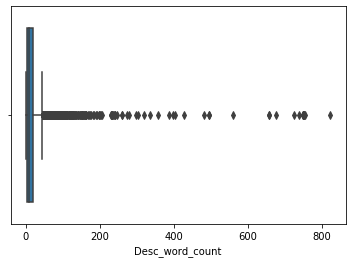

In [0]:
sns.boxplot(df2['Desc_word_count'])

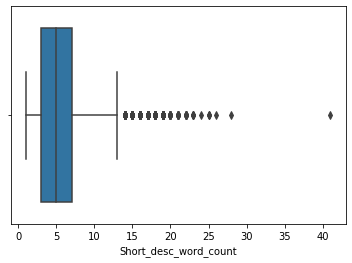

In [0]:
sns.boxplot(df2['Short_desc_word_count'])

In [0]:
df2.head()

,Short description,Description,Caller,Assignment group,Desc_word_count,Short_desc_word_count
0,"['login', 'issue']","['verified', 'user', 'details', 'employee', 'm...",spxjnwir pjlcoqds,GRP_0,22,2
1,['outlook'],"['received', 'hmjdrvpb', 'komuaywn', 'gmail', ...",hmjdrvpb komuaywn,GRP_0,19,1
2,"['cant', 'log', 'vpn']","['received', 'eylqgodm', 'ybqkwiam', 'gmail', ...",eylqgodm ybqkwiam,GRP_0,9,3
3,"['unable', 'access', 'hr_tool', 'page']","['unable', 'access', 'hr', 'tool', 'page']",xbkucsvz gcpydteq,GRP_0,5,4
4,"['skype', 'error']","['skype', 'error']",owlgqjme qhcozdfx,GRP_0,2,2


In [0]:
df3 = df2.copy(deep=True)
df4 = df2.copy(deep=True)

In [0]:
df3.drop(['Desc_word_count','Short_desc_word_count','Short description','Caller'],axis=1,inplace=True)
df4.drop(['Desc_word_count','Description','Short_desc_word_count','Caller'],axis=1,inplace=True)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
cv = CountVectorizer()
x = cv.fit_transform(df3['Description'])
y = df3['Assignment group']

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [0]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))
y_pred = model.predict(x_test)

0.6885294117647058
0.6376470588235295


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       GRP_0       0.68      0.99      0.80       825
       GRP_1       0.00      0.00      0.00         3
      GRP_10       0.00      0.00      0.00        27
      GRP_11       0.00      0.00      0.00         3
      GRP_12       0.40      0.37      0.38        46
      GRP_13       0.31      0.39      0.35        28
      GRP_14       1.00      0.17      0.29        24
      GRP_15       0.00      0.00      0.00         5
      GRP_16       0.00      0.00      0.00        17
      GRP_17       0.00      0.00      0.00        12
      GRP_18       0.50      0.10      0.17        20
      GRP_19       0.83      0.14      0.23        37
       GRP_2       0.62      0.43      0.51        47
      GRP_20       0.00      0.00      0.00         6
      GRP_21       0.00      0.00      0.00         9
      GRP_22       0.00      0.00      0.00         4
      GRP_23       0.00      0.00      0.00         9
      GRP_24       0.72    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
cv = CountVectorizer()
x1 = cv.fit_transform(df4['Short description'])
y1 = df4['Assignment group']

In [0]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [0]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x1_train, y1_train)
print(model.score(x1_train,y1_train))
print(model.score(x1_test,y1_test))
y_pred = model.predict(x1_test)

0.6885294117647058
0.6376470588235295


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y1_test,y_pred))

              precision    recall  f1-score   support

       GRP_0       0.68      0.99      0.80       825
       GRP_1       0.00      0.00      0.00         3
      GRP_10       0.00      0.00      0.00        27
      GRP_11       0.00      0.00      0.00         3
      GRP_12       0.40      0.37      0.38        46
      GRP_13       0.31      0.39      0.35        28
      GRP_14       1.00      0.17      0.29        24
      GRP_15       0.00      0.00      0.00         5
      GRP_16       0.00      0.00      0.00        17
      GRP_17       0.00      0.00      0.00        12
      GRP_18       0.50      0.10      0.17        20
      GRP_19       0.83      0.14      0.23        37
       GRP_2       0.62      0.43      0.51        47
      GRP_20       0.00      0.00      0.00         6
      GRP_21       0.00      0.00      0.00         9
      GRP_22       0.00      0.00      0.00         4
      GRP_23       0.00      0.00      0.00         9
      GRP_24       0.72    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
!pip install textblob

In [0]:
from textblob import TextBlob
b = TextBlob('an mehreren pc lassen sich verschiedene prgramdntyme nicht ã ffnen bereich cnc')
c = TextBlob('unable to access hr tool page	')
print(b.detect_language())
print(c.detect_language())

de
en


In [0]:
!pip install polyglot
!pip install PyICU
!pip install pycld2

     |████████████████████████████████| 133kB 5.0MB/s 
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52557 sha256=a536803a637b5155eb69c1f3617bb8991ff9d221a66809e39cc1bd66fd343846
  Stored in directory: /root/.cache/pip/wheels/5e/91/ef/f1369fdc1203b0a9347d4b24f149b83a305f39ab047986d9da
Successfully built polyglot
     |████████████████████████████████| 225kB 4.7MB/s 
  Created wheel for PyICU: filename=PyICU-2.4.2-cp36-cp36m-linux_x86_64.whl size=1245327 sha256=96bee6778f9900ab1a26a271c4d107b7d8e1ade56d912b822e2250c14791fdc9
  Stored in directory: /root/.cache/pip/wheels/d6/78/89/08a15173ae1905de95ce9a5f55b17259ca5b462ed11a4c068c
Successfully built PyICU
     |████████████████████████████████| 41.4MB 102kB/s 
  Created wheel for pycld2: filename=pycld2-0.41-cp36-cp36m-linux_x86_64.whl size=9833413 sha256=ae8184f6f37cff9c3583e2c8b268a57e41adb747f0423fe70e318f762b8c565e
  Stored in directory: /root/.cache/pip/wheels/c6/8f/e9/08a1a8932a490175bd140206cd86a

In [0]:
from polyglot.detect import Detector

mixed_text = u"""
an mehreren pc lassen sich verschiedene prgramdntyme nicht ã ffnen bereich cnc,
officially the People's Republic of China (PRC), is a sovereign state
located in East Asia
"""
for language in Detector(mixed_text).languages:
        print(language)

name: German      code: de       confidence:  53.0 read bytes:   855
name: English     code: en       confidence:  46.0 read bytes:  1263
name: un          code: un       confidence:   0.0 read bytes:     0


In [0]:
MAX_NB_WORDS = 20000

Encoding the data using Tokenizer

In [0]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=MAX_NB_WORDS,split=' ')
Description_df = df1['Description']
tokenizer.fit_on_texts(Description_df)

Using TensorFlow backend.


Removing Stopwords from Description column

In [0]:
Description = []
for sentence in Description_df:
  word_tokens = word_tokenize(sentence)
  filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  filtered_sentence = []
  for w in word_tokens:
      if w not in stop_words:
        filtered_sentence.append(w)
  Description.append(filtered_sentence)

In [0]:
print(Description[0])

['verified', 'user', 'details', 'employee', 'manager', 'name', 'checked', 'user', 'name', 'ad', 'reset', 'password', 'advised', 'user', 'login', 'check', 'caller', 'confirmed', 'able', 'login', 'issue', 'resolved']


In [0]:
len(Description[0])

22

Getting the maximun word count present in Description Column

In [0]:
MAX_SENT_LENGTH=0
for desc in Description:
  if MAX_SENT_LENGTH < len(desc):
    MAX_SENT_LENGTH = len(desc)
print(MAX_SENT_LENGTH)      

822


Creating Data array to hold word index values

In [0]:
import numpy as np
data = np.zeros((len(Description),25))
data.shape

(8500, 25)

In [0]:
data=data.astype('int32')

Replacing dummy array with word index values for each Description

In [0]:
from keras.preprocessing.text import text_to_word_sequence
x=0
for description in Description:
  tkn = tokenizer.texts_to_sequences(description)#converting text to sequence
  if(len(tkn)>0):
    token_indexed = np.concatenate(tkn,axis=0).tolist()#converting array of array to single array
    token_indexed = np.pad(token_indexed,(0,25))#appending max word count for each description
    token_indexed = token_indexed[0:25]#get the first 822 values from each token
    data[x]= token_indexed
    x=x+1

In [0]:
print(data[0])

[197  25 207 262 109  50 377  25  50 301  36  24 534  25  65 101 365 295
  87  65  38 283   0   0   0]


Convert labels into one-hot vectors

In [0]:
assignment_group = pd.DataFrame(df1['Assignment group'])
group = pd.get_dummies(assignment_group,columns=['Assignment group'])

In [0]:
group.head()

,Assignment group_GRP_0,Assignment group_GRP_1,Assignment group_GRP_10,Assignment group_GRP_11,Assignment group_GRP_12,Assignment group_GRP_13,Assignment group_GRP_14,Assignment group_GRP_15,Assignment group_GRP_16,Assignment group_GRP_17,Assignment group_GRP_18,Assignment group_GRP_19,Assignment group_GRP_2,Assignment group_GRP_20,Assignment group_GRP_21,Assignment group_GRP_22,Assignment group_GRP_23,Assignment group_GRP_24,Assignment group_GRP_25,Assignment group_GRP_26,Assignment group_GRP_27,Assignment group_GRP_28,Assignment group_GRP_29,Assignment group_GRP_3,Assignment group_GRP_30,Assignment group_GRP_31,Assignment group_GRP_32,Assignment group_GRP_33,Assignment group_GRP_34,Assignment group_GRP_35,Assignment group_GRP_36,Assignment group_GRP_37,Assignment group_GRP_38,Assignment group_GRP_39,Assignment group_GRP_4,Assignment group_GRP_40,Assignment group_GRP_41,Assignment group_GRP_42,Assignment group_GRP_43,Assignment group_GRP_44,Assignment group_GRP_45,Assignment group_GRP_46,Assignment group_GRP_47,Assignment group_GRP_48,Assignment group_GRP_49,Assignment group_GRP_5,Assignment group_GRP_50,Assignment group_GRP_51,Assignment group_GRP_52,Assignment group_GRP_53,Assignment group_GRP_54,Assignment group_GRP_55,Assignment group_GRP_56,Assignment group_GRP_57,Assignment group_GRP_58,Assignment group_GRP_59,Assignment group_GRP_6,Assignment group_GRP_60,Assignment group_GRP_61,Assignment group_GRP_62,Assignment group_GRP_63,Assignment group_GRP_64,Assignment group_GRP_65,Assignment group_GRP_66,Assignment group_GRP_67,Assignment group_GRP_68,Assignment group_GRP_69,Assignment group_GRP_7,Assignment group_GRP_70,Assignment group_GRP_71,Assignment group_GRP_72,Assignment group_GRP_73,Assignment group_GRP_8,Assignment group_GRP_9
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
labels = np.array(group)
print(labels[0])

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Check the shape of data and label arrays

In [0]:
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (8500, 25)
Shape of label tensor: (8500, 74)


Shuffling the data & labels

In [0]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

Creating training and testing set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(data,labels, test_size = 0.20, random_state = 42)

In [0]:
X_train[0]

array([  11, 1636, 1637,   12,    3, 1636, 1637, 4979,  230,  150,  621,
       1636, 1637,   12,    3,  118, 1636, 1637,   12,    3,    0,    0,
          0,    0,    0], dtype=int32)

In [0]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(6800, 25)
(6800, 74)
(1700, 25)
(1700, 74)


In [0]:
X_train[0]

array([  11, 1636, 1637,   12,    3, 1636, 1637, 4979,  230,  150,  621,
       1636, 1637,   12,    3,  118, 1636, 1637,   12,    3,    0,    0,
          0,    0,    0], dtype=int32)

In [0]:
from keras.datasets import imdb
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
np.random.seed(7)

In [0]:
from keras.layers import Bidirectional
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, embedding_vecor_length, input_length=25))
model.add(Bidirectional(LSTM(130)))
model.add(Dense(74, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=3, batch_size=64)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 32)            640000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 260)               169520    
_________________________________________________________________
dense_1 (Dense)              (None, 74)                19314     
Total params: 828,834
Trainable params: 828,834
Non-trainable params: 0
_________________________________________________________________
None



Train on 6800 samples, validate on 1700 samples
Epoch 1/3





6800/6800 [==============================] - 13s 2ms/step - loss: 0.0502 - acc: 0.9863 - val_loss: 0.0456 - val_acc: 0.9865
Epoch 2/3
6800/6800 [==============================] - 11s 2ms/step - loss: 0.0463 -

In [0]:
y_pred = model.predict(X_val)

In [0]:
y_pred1 = np.where(y_pred > 0.5, 1, 0)
y_pred1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [0]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [0]:
from sklearn.metrics import classification_report
print(classification_report(Y_val,y_pred1))

              precision    recall  f1-score   support

           0       0.52      0.31      0.39       828
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        55
           5       0.00      0.00      0.00        27
           6       0.00      0.00      0.00        24
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        13
           9       0.00      0.00      0.00        11
          10       0.00      0.00      0.00        20
          11       0.00      0.00      0.00        39
          12       0.00      0.00      0.00        36
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         8
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
